
# Project : Investigate a DataSet (TMDB Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Prof">Data Profiling</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview 
>I am using TMDB movies dataset for my Udacity Nanodegree Project : Investigate a Dataset.

>TMDB movies dataset provides us information about thousands of movies like : budget , titlet, popularity, runtime etc
TMDB Credits provides information about the cast and crew
This will help us identify how each film performed when they are realeased.
Moreover, helps us to make predications for fututre films having similar features.

> 20 Columns in the TMDB_movies dataset are as follows:
- budget
- genres
- homepage
- id
- keywords
- original_language
- original_title
- overview
- popularity
- production_companies
- production_countries
- release_date
- revenue
- runtime
- spoken_languages
- status
- tagline	title
- vote_average
- vote_count

> 4 Columns in TMDB_Credits dataset
- Movie_id
- title
- cast
- crew

### Questions we can asnwer using this data set
- Minimum and maximum profit
#### Top 10 Movies
-   Top 10 profitable movie
-   Top 10 popular movie 
-   Top 10 movie who received most avg_vote
#### Correlation
-   How do popularity co-relate with revenue
-   How do Budget co-relate with revenue
-   How do Vote_Average co-relate with revenue
#### Trends
-    Release in certains month/week affecting the revenue
-    Runtime trends over years
#### Top 10 genres, cast and companies who are involved in most proftibale movies
- Top 10 genres
- Top 10 cast
- Top 10 Production Comapanies


In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
% matplotlib inline
import json
from datetime import datetime

<a id="#Prof"></a>
## Data Profiling

> Data profiling is the process of examining the data available from an existing information source (e.g. a database or a file) and collecting statistics or informative summaries about that data. 

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data
df1 = pd.read_csv ('tmdb_5000_movies.csv')
df2 = pd.read_csv('tmdb_5000_credits.csv')
df1.head()

In [298]:
df2.head()

# Merge 2 datset using ID as key
df =df1.merge(df2,left_on ='id', right_on ='movie_id', how ='inner')


In [299]:
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [300]:
df.shape

(4803, 24)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

### Identifying dulpicates in the Dataset

In [302]:
sum(df.duplicated())

0

### Identifying columns having Null values

In [303]:
df.columns[df.isnull().any()].tolist()

['homepage', 'overview', 'release_date', 'runtime', 'tagline']

In [304]:
sum(df.isnull().any(axis = 1))

3310

In [305]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


<a id='Wrangling'></a>
## Data Wangling

### Observations for Data Cleaning

- There is no duplicates
- columns production_companies and genres are in weird format 
   - for example current data is represented  as [{"id": 28, "name": "Action"}, {"id": 12, "nam...) 
- Observed nulls in multiple columns 
- No assocaited currency values for budget and revenue

### Data Cleaning

- Eliminate non useful columns from the dataset.
- Columns Runtime and Release date are important and contains nulls. Hence we need to drop the  records with missing values.
- As mentioned Production companies and gneres requires cleaning. Output would look as Action|Thriller.
- Rename Budget and Revenue columns to indicates Currency unit is "Dollars"
- Release_Date datatype to Datetime

### Eliminate Non - Useful columns

In [306]:
# Select Columns of interest
col_req=['budget','original_title','genres','id','popularity','production_companies'
         ,'release_date','revenue','runtime','vote_average','vote_count','cast','crew']
df_new = df[col_req]
df_new.head()

,budget,original_title,genres,id,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,cast,crew
0,237000000,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",12/10/2009,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",5/19/2007,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",10/26/2015,880674609,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",7/16/2012,1084939099,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",3/7/2012,284139100,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."



### Drop null records

In [307]:
# Droppind records so we have all the important information to performa data analysis
df_new.dropna(subset=['release_date','runtime','cast','production_companies','crew'],inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 13 columns):
budget                  4800 non-null int64
original_title          4800 non-null object
genres                  4800 non-null object
id                      4800 non-null int64
popularity              4800 non-null float64
production_companies    4800 non-null object
release_date            4800 non-null object
revenue                 4800 non-null int64
runtime                 4800 non-null float64
vote_average            4800 non-null float64
vote_count              4800 non-null int64
cast                    4800 non-null object
crew                    4800 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 525.0+ KB


C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Rename Budget And Renvenue Column Names

In [308]:
df_new.rename(columns = {'budget':'budget_usd','revenue':'revenue_usd'},inplace=True)
df_new

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,budget_usd,original_title,genres,id,popularity,production_companies,release_date,revenue_usd,runtime,vote_average,vote_count,cast,crew
0,237000000,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",12/10/2009,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",5/19/2007,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",10/26/2015,880674609,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",7/16/2012,1084939099,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",3/7/2012,284139100,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,Spider-Man 3,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",5/1/2007,890871626,139.0,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,Tangled,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",11/24/2010,591794936,100.0,7.4,3330,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,280000000,Avengers: Age of Ultron,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",4/22/2015,1405403694,141.0,7.3,6767,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,250000000,Harry Potter and the Half-Blood Prince,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",7/7/2009,933959197,153.0,7.4,5293,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,250000000,Batman v Superman: Dawn of Justice,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...",3/23/2016,873260194,151.0,5.7,7004,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


### Format Columns Genres and Production companies, Cast and Crew

In [309]:
# First need to split x and then find the word after "name" and replace extra brakets and quotes to get the final output

x = df_new["genres"].iloc[0] 
def temp(x):
    st = []
    new_list = x.split(",")
    for i in new_list:
        if "name" in i:
            st.append(i.split(":")[1].replace(" ", "").replace("}", "").replace("[","").replace("]","").replace('"',""))
    return '|'.join(st)
df_new['genres']= df_new['genres'].apply(lambda x: temp(x)) 

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [310]:
# using json library
#On genres apply a function temp on each row value x
#x is a string like '[{'id:'','name':'dsfs'}]' can't change a string back to list as it will create a list of each letter. 
#So u use the json.loads() function which converts a python string to a json format. Now we get the list of dictionaries. 
 
def temp(x):       
    st = []
    for i in list(json.loads(x)):
        st.append(i['name'])
    if len(st)!=0:
        return '|'.join(st)
df_new['production_companies'] = df_new['production_companies'].apply(lambda x: temp(x)) 

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [311]:
# using json library
#On genres apply a function temp on each row value x
#x is a string like '[{'id:'','name':'dsfs'}]' can't change a string back to list as it will create a list of each letter. 
#So u use the json.loads() function which converts a python string to a json format. Now we get the list of dictionaries. 

def temp(x):
    st =[]
    for i in list(json.loads(x)):
        st.append(i['name'])
    if len(st)!=0:
        return '|'.join(st)
df_new['crew']= df_new['crew'].apply(lambda x:temp(x))

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [312]:
# using json library
#On genres apply a function temp on each row value x
#x is a string like '[{'id:'','name':'dsfs'}]' can't change a string back to list as it will create a list of each letter. 
#So u use the json.loads() function which converts a python string to a json format. Now we get the list of dictionaries. 
def temp(x):
    st = []
    for i in list(json.loads(x)):
        st.append(i['name'])
    if len(st)!=0:
        return '|'.join(st)
df_new['cast']= df['cast'].apply(lambda x :temp(x))

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [313]:
df_new.head()

,budget_usd,original_title,genres,id,popularity,production_companies,release_date,revenue_usd,runtime,vote_average,vote_count,cast,crew
0,237000000,Avatar,Action|Adventure|Fantasy|ScienceFiction,19995,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,2787965087,162.0,7.2,11800,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Stephen E. Rivkin|Rick Carter|Christopher Boye...
1,300000000,Pirates of the Caribbean: At World's End,Adventure|Fantasy|Action,285,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/2007,961000000,169.0,6.9,4500,Johnny Depp|Orlando Bloom|Keira Knightley|Stel...,Dariusz Wolski|Gore Verbinski|Jerry Bruckheime...
2,245000000,Spectre,Action|Adventure|Crime,206647,107.376788,Columbia Pictures|Danjaq|B24,10/26/2015,880674609,148.0,6.3,4466,Daniel Craig|Christoph Waltz|Léa Seydoux|Ralph...,Thomas Newman|Sam Mendes|Anna Pinnock|John Log...
3,250000000,The Dark Knight Rises,Action|Crime|Drama|Thriller,49026,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,7/16/2012,1084939099,165.0,7.6,9106,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Hans Zimmer|Charles Roven|Christopher Nolan|Ch...
4,260000000,John Carter,Action|Adventure|ScienceFiction,49529,43.926995,Walt Disney Pictures,3/7/2012,284139100,132.0,6.1,2124,Taylor Kitsch|Lynn Collins|Samantha Morton|Wil...,Andrew Stanton|Andrew Stanton|John Lasseter|Co...


### Change Release Date datatype to Datetime

In [314]:
df_new['release_date']=pd.to_datetime(df_new['release_date'])
df_new.head()

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,budget_usd,original_title,genres,id,popularity,production_companies,release_date,revenue_usd,runtime,vote_average,vote_count,cast,crew
0,237000000,Avatar,Action|Adventure|Fantasy|ScienceFiction,19995,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,2787965087,162.0,7.2,11800,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Stephen E. Rivkin|Rick Carter|Christopher Boye...
1,300000000,Pirates of the Caribbean: At World's End,Adventure|Fantasy|Action,285,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,961000000,169.0,6.9,4500,Johnny Depp|Orlando Bloom|Keira Knightley|Stel...,Dariusz Wolski|Gore Verbinski|Jerry Bruckheime...
2,245000000,Spectre,Action|Adventure|Crime,206647,107.376788,Columbia Pictures|Danjaq|B24,2015-10-26,880674609,148.0,6.3,4466,Daniel Craig|Christoph Waltz|Léa Seydoux|Ralph...,Thomas Newman|Sam Mendes|Anna Pinnock|John Log...
3,250000000,The Dark Knight Rises,Action|Crime|Drama|Thriller,49026,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,2012-07-16,1084939099,165.0,7.6,9106,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Hans Zimmer|Charles Roven|Christopher Nolan|Ch...
4,260000000,John Carter,Action|Adventure|ScienceFiction,49529,43.926995,Walt Disney Pictures,2012-03-07,284139100,132.0,6.1,2124,Taylor Kitsch|Lynn Collins|Samantha Morton|Wil...,Andrew Stanton|Andrew Stanton|John Lasseter|Co...


<a id='eda'></a>
# Exploratory Data Analysis

### 1) Minimum and maximum profit

In [315]:
# Identifying profit earned by each film by subtracting budget from revenue
df_new['profit'] = df_new['revenue_usd'] - df_new['budget_usd']

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [316]:
# finding details of the film earning minimum profit.
#used function idmin which Return index of first occurrence of minimum
low = df_new['profit'].idxmin()
low_details = pd.DataFrame(df_new.loc[low])
low_details

,13
budget_usd,255000000
original_title,The Lone Ranger
genres,Action|Adventure|Western
id,57201
popularity,49.047
production_companies,Walt Disney Pictures|Jerry Bruckheimer Films|I...
release_date,2013-07-03 00:00:00
revenue_usd,89289910
runtime,149
vote_average,5.9


In [317]:
# finding details of the film earning maximum profit.
#used function idmin which Return index of first occurrence of maximum
high= df_new['profit'].idxmax()
high_details = pd.DataFrame(df_new.loc[high])
high_details

,0
budget_usd,237000000
original_title,Avatar
genres,Action|Adventure|Fantasy|ScienceFiction
id,19995
popularity,150.438
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,2009-12-10 00:00:00
revenue_usd,2787965087
runtime,162
vote_average,7.2


### 2) Top 10 movies

### 2.1) Top 10 Profitable movies


In [318]:
# To identify the top 10 profitable movies, i have first sorted the data in descending order(column = Profit)
# Similarily i have done thos for popularity and average vote for each movie
sort_profit= df_new['profit'].sort_values(ascending= False)[:10]
sort_popular= df_new['popularity'].sort_values(ascending= False)[:10]
sort_vote = df_new['vote_average'].sort_values(ascending= False)[:10]
sort_popular


546    875.581305
95     724.247784
788    514.569956
94     481.098624
127    434.278564
28     418.708552
199    271.972889
82     243.791743
200    206.227151
88     203.734590
Name: popularity, dtype: float64

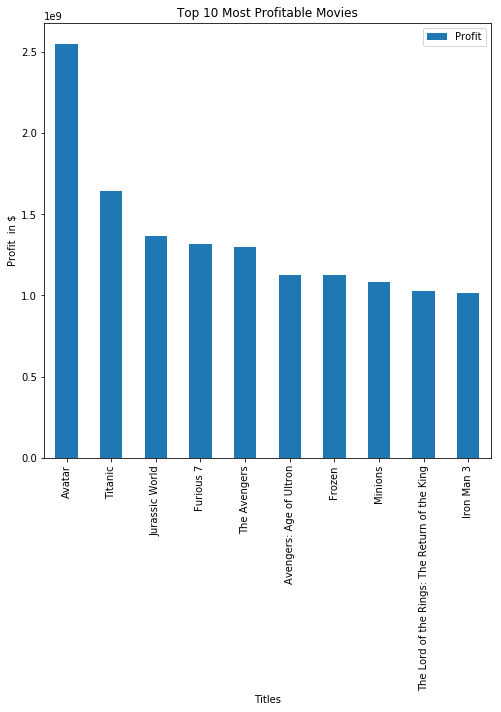

In [319]:
# I have created a function where I am appeneding title and profit using index. Plot bar chart to show
Top10_Profit=pd.DataFrame()
titles=[]
profit=[]
for i in sort_profit.index:
    titles.append(df_new.loc[i,'original_title'])
    profit.append(sort_profit.loc[i])
Top10_Profit['Titles'] = titles
Top10_Profit['Profit'] = profit
Top10_Profit.set_index('Titles',inplace=True)
# plotting a bar chart
Top10_Profit.plot(kind ='bar', figsize= (8,8))
# Chart Title 
plt.title('Top 10 Most Profitable Movies');
# Chart Y axis Label
plt.ylabel('Profit  in $');

### 2.2) Top 10 popular movies

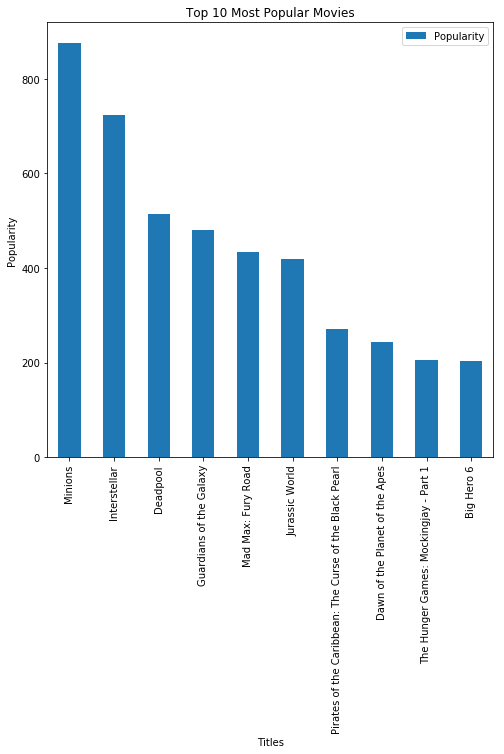

In [320]:
# I have created a function where I am appeneding title and popularity using index. Plot bar chart to show
Top10_Popular=pd.DataFrame()
titles=[]
popularity=[]
for i in sort_popular.index:
    titles.append(df_new.loc[i,'original_title'])
    popularity.append(sort_popular.loc[i])
Top10_Popular['Titles'] = titles
Top10_Popular['Popularity'] = popularity
Top10_Popular.set_index('Titles',inplace=True)
# plotting a bar chart
Top10_Popular.plot(kind ='bar', figsize= (8,8))
# Chart Title 
plt.title('Top 10 Most Popular Movies');
# Chart Y axis Label
plt.ylabel('Popularity');

### 2.3) Top 10 based on votes

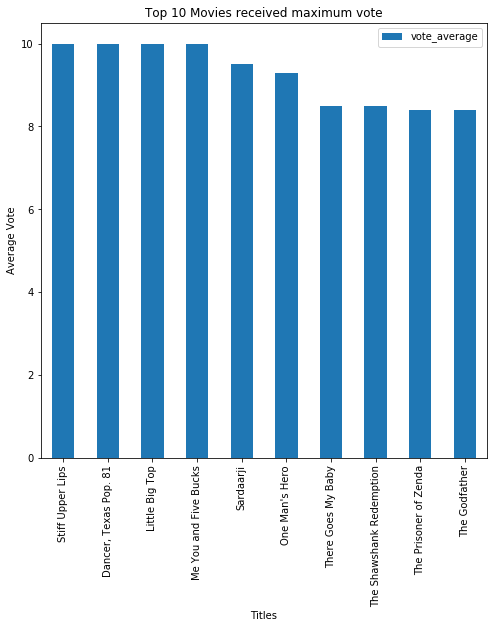

In [321]:
# I have created a function where I am appeneding title and vote using index. Plot bar chart to show
Top10_vote=pd.DataFrame()
titles=[]
vote=[]
for i in sort_vote.index:
    titles.append(df_new.loc[i,'original_title'])
    vote.append(sort_vote.loc[i])
Top10_vote['Titles'] = titles
Top10_vote['vote_average'] = vote
Top10_vote.set_index('Titles',inplace=True)
# plotting a bar chart
Top10_vote.plot(kind ='bar', figsize= (8,8))
# Chart Title 
plt.title('Top 10 Movies received maximum vote');
# Chart Y axis Label
plt.ylabel('Average Vote');

## 3) Co-relation

###  3.1) Popularity Vs Revenue

Text(0.5,1,'Revenue Vs Popularity')

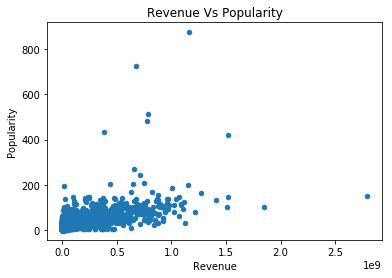

In [322]:
# trying to identify if there is any relation between revenue and popuularity of the movie
# to understand the relation i am plotting a scatter plot to check the trends
df_new.plot(x ='revenue_usd',y='popularity',kind='scatter');
# X axis Label
plt.xlabel('Revenue');
# y axis Label
plt.ylabel('Popularity');
# Chart Title
plt.title('Revenue Vs Popularity')


### 3.2) Budget Vs Revenue


Text(0.5,1,'Revenue Vs Budget')

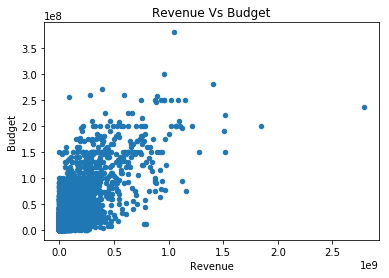

In [323]:
# trying to identify if there is any relation between revenue and budget of the movie
# to understand the relation i am plotting a scatter plot to check the trends
df_new.plot(x ='revenue_usd',y='budget_usd',kind='scatter');
# X axis Label
plt.xlabel('Revenue');
# y axis Label
plt.ylabel('Budget');
# Chart Title
plt.title('Revenue Vs Budget')


Text(0.5,1,'Revenue Vs Vote')

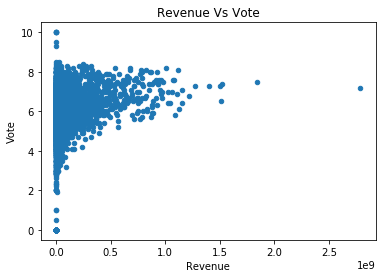

In [324]:
# trying to identify if there is any relation between revenue and avg_vote of the movie
# to understand the relation i am plotting a scatter plot to check the trends
df_new.plot(x ='revenue_usd',y='vote_average',kind='scatter');
# X axis Label
plt.xlabel('Revenue');
# y axis Label
plt.ylabel('Vote');
# Chart Title
plt.title('Revenue Vs Vote')


### Observations 

We can sobserve that both popularity and budget have a positive impact on revenue.

## 4) Trends

### 4.1) Average Runtime over years

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Average Runtime over years')

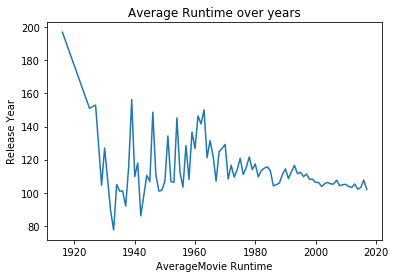

In [325]:
# To identify the average runtime over years:
# I have extracted year information from Release data column.
#Then used the groupby function.
df_new['year'] = df_new['release_date'].dt.year
Runtime_by_years = df_new.groupby('year')['runtime'].mean()
# ploting a line chart
plt.plot(Runtime_by_years)
# Y label
plt.ylabel('Release Year')
# X label
plt.xlabel('AverageMovie Runtime')
# Title
plt.title('Average Runtime over years')

### Observations: 

As we can see the runtime is fluctuating a lot in first half of the 20th century, however later we see it declining and becoming more stable.
From this we can deduce that on average people prefer to watch movies which have 100-120min of runtime

### 4.2) Movie Release in a particular month affecting Profits

C:\Users\A642431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,'Average Profit over months')

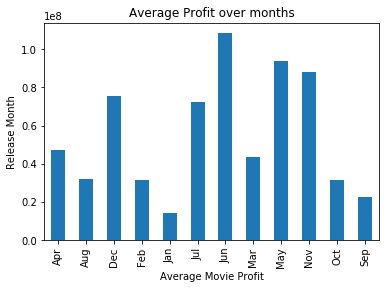

In [326]:
# To identify the average profit over months:
# I have extracted year information from Release data column.
#Then used the groupby function.
#df_new['month'] = df_new['release_date'].dt.month
df_new['Month-str'] = df_new['release_date'].dt.strftime('%b')
Profit_by_months = df_new.groupby('Month-str')['profit'].mean()
# ploting a line chart
Profit_by_months.plot(x = 'Month-str', y = 'profit',kind = 'bar')
# Y label
plt.ylabel('Release Month')
# X label
plt.xlabel('Average Movie Profit')
# Title
plt.title('Average Profit over months')

### Observation

We can observe that movies releasing in June are earning more profit compared to other months


### 5) Top 10 production companies,genres and cast involved in most pofitable movies


In [327]:
# Create a data set containing where profit is greater then 500million

df_profit = df_new.query('profit>500000000')


# Since each movie is assocaited with multiple genres, prodcution cast and crew. 
#I am using a function to separate them and understand their effect on profit
# Function: First i will separate the string by '|' and then store it using pandas series and return the count
def split_data(column_name):
    data =df_profit[column_name].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count


(Warner Bros.                              14
 Walt Disney Pictures                      13
 Paramount Pictures                        11
 Columbia Pictures                          9
 Twentieth Century Fox Film Corporation     9
 Universal Pictures                         8
 Lucasfilm                                  7
 Pixar Animation Studios                    6
 Revolution Sun Studios                     6
 Marvel Studios                             6
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x2969feb8>)

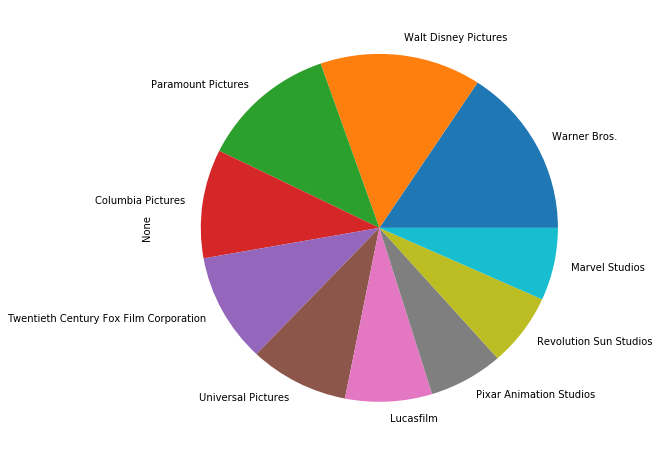

In [328]:
# Since we have so many production companies and chart will look messy,
#hence i have limited the dataset to top 10 companies having profit greater then 500million.

comp_count = split_data('production_companies').sort_values(ascending = False)[:10]
comp_count.head(10),comp_count.plot(kind = 'pie',figsize = (8,8))

(Stan Lee             12
 Jess Harnell          9
 Hugo Weaving          9
 Christopher Lee       8
 Samuel L. Jackson     8
 Warwick Davis         8
 Orlando Bloom         8
 Alan Rickman          7
 Gary Oldman           7
 Ian McKellen          7
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x33c9e588>)

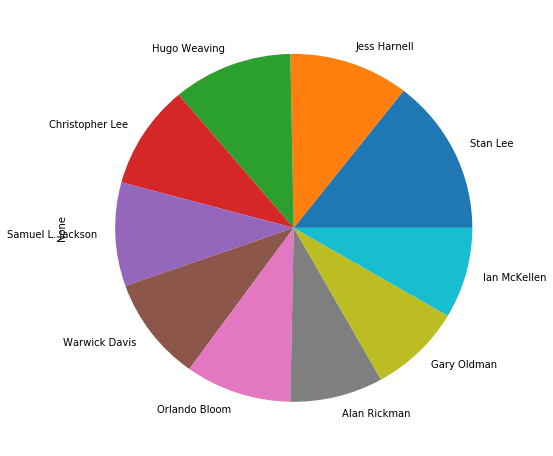

In [329]:
# Since we have so many production companies and chart will look messy,
#hence i have limited the dataset to top 10 companies having profit greater then 500million.
cast_count = split_data('cast').sort_values(ascending = False)[:10]
cast_count.head(10),cast_count.plot(kind = 'pie',figsize = (8,8))

(Adventure         75
 Action            52
 Fantasy           36
 ScienceFiction    32
 Family            31
 Animation         20
 Drama             17
 Thriller          16
 Comedy            15
 Romance            8
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x33d894e0>)

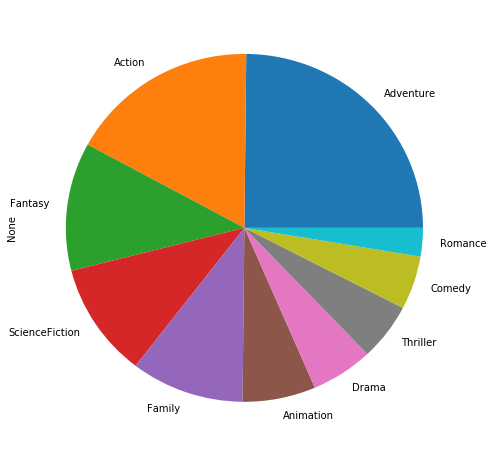

In [330]:
# Since we have so many production companies and chart will look messy,
#hence i have limited the dataset to top 10 companies having profit greater then 500million.
gen_count = split_data('genres').sort_values(ascending = False)[:10]
gen_count.head(10),gen_count.plot(kind = 'pie',figsize = (8,8))

### Observations

People are attracted to adventure oand action movies. Movies of such gneres in future exprect to do better comapred to others
Moreover, movies by big production house like Disney and Warner Bros have good reputation among viewers and likely to do better.

<a id='conclusion'></a>
# Conclusion
>Dataset is extremely useful for make prediction for forthcoming movies.
I started my analysis by first looking at the dataset and removing duplicates and null. Also changed datatype for Release_date column to datatime. Later I  performed exploratory analysis and found the following findings:
- Most profitable movie is :Avatar
- Least profitbale movie is:The Lone Ranger
- Even the most profitbale movie is Avatar, however most popular movie is Minion and not Avatar. So its not always necessary that the most popular will be most profitable. 
- We can also observe movies releasing in June earns maximum profit
- Most popular and profiable production companies: Warner Bros and Disney
- Most popular and profiable genres are: adventure and action

>Limitations: Couple of limitation in the dataset are:
- Null values 
- For columns like : Genres, Production_companies, cast and crew, data is a string like '[{'id:'','name':'dsfs'}]' can't change a string back to list as it will create a list of each letter. Later convert the string to list of dictionaries.
- Changing data type for Release_Date Column 

These initial analysis will lead the way for futhure analysis and predcitions